# Name of the task : Exploratory Data Analysis- Sports
# Task Category : Data Science & Business Analytics
# Performed by : Sreekanth N, Ph.D.
# Organization : The Sparks Foundation

# Steps Involved

# Objectives of task

# Version Verification of Libraries

In [63]:
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import seaborn
# Seaborn 
print ('seaborn: {}'.format(seaborn.__version__))

numpy: 1.19.2
matplotlib: 3.3.2
pandas: 1.1.3
sklearn: 0.23.2
seaborn: 0.11.0


# Import of Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import os 
import matplotlib


print ("libraries imported succcessfully")

libraries imported succcessfully


# Reading dataset

In [13]:
df_ipl_matches=pd.read_csv(r"C:\Users\Biofact\Desktop\data\iplmatches.csv")
print ("Data read successfully")

Data read successfully


# Reading Deliveries dataset

In [6]:
df_ipl_matches_deliveries=pd.read_csv(r"C:\Users\Biofact\Desktop\data\deliveries.csv")
print ("Data read successfully")

Data read successfully


# STEP 1 : PRE PROCESSING OF DATA

# Dimensions of the data

In [3]:
df_ipl_matches.shape

(756, 18)

# Peek at the Data

In [46]:
df_ipl_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0
1,2,2017,Pune,06-04-2017,MI,PW,PW,field,normal,0,PW,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,0
2,3,2017,Rajkot,07-04-2017,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,0
3,4,2017,Indore,08-04-2017,PW,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,0
4,5,2017,Bangalore,08-04-2017,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,0,0,0


In [45]:
df_ipl_matches.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05-05-2019,KKR,MI,MI,field,normal,0,MI,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07-05-2019,CSK,MI,CSK,bat,normal,0,MI,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08-05-2019,SRH,RPS,RPS,field,normal,0,RPS,0,2,RR Pant,ACA-VDCA Stadium,0,0,0
754,11414,2019,Visakhapatnam,10-05-2019,RPS,CSK,CSK,field,normal,0,CSK,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12-05-2019,MI,CSK,MI,bat,normal,0,MI,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [28]:
df_ipl_matches["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [30]:
df_ipl_matches["team2"].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [31]:
df_ipl_matches_deliveries["batting_team"].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [32]:
df_ipl_matches_deliveries["bowling_team"].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [10]:
df_ipl_matches.replace (['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals']
                , ['SRH','MI','GL','RPS','RCB','KKR','DD','KXIP','CSK','RR','DCS','KTK','PW','RPS','DC'],inplace=True)

In [13]:
df_ipl_matches_deliveries.replace(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals']
                ,['SRH','RCB','MI','RPS','GL','KKR','KXIP','DD','CSK','RR','DC','KTK','PW','RPS','DC'],inplace=True)

In [11]:
print('Total Matches Played:',df_ipl_matches.shape[0])
print(' \n Venues Played At:',df_ipl_matches['city'].unique())     
print(' \n Teams :',df_ipl_matches['team1'].unique())

Total Matches Played: 756
 
 Venues Played At: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']
 
 Teams : ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


In [12]:
print('Total venues played at:',df_ipl_matches['city'].nunique())
print('\nTotal umpires ',df_ipl_matches['umpire1'].nunique())

Total venues played at: 32

Total umpires  61


In [13]:
print((df_ipl_matches['player_of_match'].value_counts()).idxmax(),' : has most man of the match awards')
print(((df_ipl_matches['winner']).value_counts()).idxmax(),': has the highest number of match wins')

CH Gayle  : has most man of the match awards
Mumbai Indians : has the highest number of match wins


In [13]:
df_ipl_matches.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [14]:
df_ipl_matches.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

# Full Summary of Data

In [6]:
df_ipl_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# Statistical Summary of Data

In [7]:
df_ipl_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


# Observations

# Columns in the data


In [8]:
df_ipl_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

# Unique values of each column

In [44]:
for col in df_ipl_matches:
    print(df_ipl_matches[col].unique())

[    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    73    74    75    76    77    78    79    80    81    82    83    84
    85    86    87    88    89    90    91    92    93    94    95    96
    97    98    99   100   101   102   103   104   105   106   107   108
   109   110   111   112   113   114   115   116   117   118   119   120
   121   122   123   124   125   126   127   128   129   130   131   132
   133   134   135   136   137   138   139   140   141   142   143   144
   145   146   147   148   149   150   151   152   153   154   155   156
   157   158   159   160   161   162   163   164   

# Count of NaN values in the column

In [10]:
#the first index that doesn't contain a NaN value 
df_ipl_matches.umpire3.first_valid_index()

636

# Conforming the first valid index

In [43]:
#Confirming the first valid index
df_ipl_matches.loc[633:640]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
633,634,2016,Delhi,25-05-2016,SRH,KKR,KKR,field,normal,0,SRH,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,0
634,635,2016,Delhi,27-05-2016,GL,SRH,SRH,field,normal,0,SRH,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,0
635,636,2016,Bangalore,29-05-2016,SRH,RCB,SRH,bat,normal,0,SRH,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,0
636,7894,2018,Mumbai,07-04-2018,MI,CSK,CSK,field,normal,0,CSK,0,1,DJ Bravo,Wankhede Stadium,Chris Gaffaney,A Nanda Kishore,Anil Chaudhary
637,7895,2018,Mohali,08-04-2018,DD,KXIP,KXIP,field,normal,0,KXIP,0,6,KL Rahul,"Punjab Cricket Association IS Bindra Stadium, ...",Rod Tucker,K Ananthapadmanabhan,Nitin Menon
638,7896,2018,Kolkata,08-04-2018,RCB,KKR,KKR,field,normal,0,KKR,0,4,SP Narine,Eden Gardens,C Shamshuddin,A.D Deshmukh,S Ravi
639,7897,2018,Hyderabad,09-04-2018,RR,SRH,SRH,field,normal,0,SRH,0,9,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",Nigel Llong,Vineet Kulkarni,O Nandan
640,7898,2018,Chennai,10-04-2018,KKR,CSK,CSK,field,normal,0,CSK,0,5,SW Billings,"MA Chidambaram Stadium, Chepauk",Anil Chaudhary,Chris Gaffaney,A Nanda Kishore


# Count of NaN values in each column

In [12]:
df_ipl_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# Total number of Null values in the dataset

In [72]:
print("Total number of null/missing values= ",df_ipl_matches.isnull().sum().sum())

Total number of null/missing values=  19


# Dropping of Column having significant number of null values

In [13]:
df_ipl_matches = df_ipl_matches.drop(columns=['umpire3'], axis=1)

# Verification of Dropped Column

In [47]:
df_ipl_matches.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0
1,2,2017,Pune,06-04-2017,MI,PW,PW,field,normal,0,PW,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,0
2,3,2017,Rajkot,07-04-2017,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,0
3,4,2017,Indore,08-04-2017,PW,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,0
4,5,2017,Bangalore,08-04-2017,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,0,0,0
5,6,2017,Hyderabad,09-04-2017,GL,SRH,SRH,field,normal,0,SRH,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,0
6,7,2017,Mumbai,09-04-2017,KKR,MI,MI,field,normal,0,MI,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,0
7,8,2017,Indore,10-04-2017,RCB,KXIP,RCB,bat,normal,0,KXIP,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,0
8,9,2017,Pune,11-04-2017,DD,PW,PW,field,normal,0,DD,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,0
9,10,2017,Mumbai,12-04-2017,SRH,MI,MI,field,normal,0,MI,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,0


In [20]:
df_ipl_matches.fillna(0,inplace=True) 

In [24]:
df_ipl_matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

<AxesSubplot:>

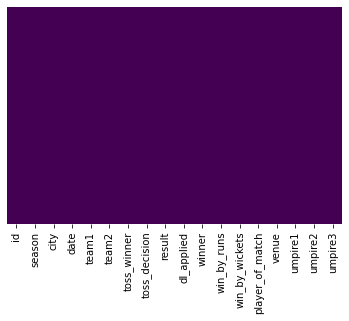

In [22]:
sns.heatmap(df_ipl_matches.isnull(),yticklabels=False,cbar=False,cmap="viridis") 

# Peek at the Data (Deliveribles)

In [48]:
df_ipl_matches_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,0,0,0
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,0,0,0


In [49]:
df_ipl_matches_deliveries.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,CSK,MI,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,0,0,0
179074,11415,2,CSK,MI,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,0,0,0
179075,11415,2,CSK,MI,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,CSK,MI,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,0,0,0
179077,11415,2,CSK,MI,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,0


In [11]:
df_ipl_matches_deliveries.shape

(179078, 21)

In [12]:
df_ipl_matches_deliveries.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [15]:
df_ipl_matches_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [17]:
df_ipl_matches_deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [18]:
df_ipl_matches_deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

# Count of NaN values in each column

In [25]:
df_ipl_matches_deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

# Total number of NaN values in the dataset

In [23]:
df_ipl_matches_deliveries.isnull().sum().sum()

513118

# Which Team had won by maximum runs?

In [50]:
df_ipl_matches.iloc[df_ipl_matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     06-05-2017
team1                            MI
team2                            DD
toss_winner                      DD
toss_decision                 field
result                       normal
dl_applied                        0
winner                           MI
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                           0
Name: 43, dtype: object

# Which Team had won by maximum wickets?

In [51]:
df_ipl_matches.iloc[df_ipl_matches['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           07-04-2017
team1                                                  GL
team2                                                 KKR
toss_winner                                           KKR
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                                                KKR
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

# Which Team had won by (closest margin) minimum runs?

In [52]:
df_ipl_matches.iloc[df_ipl_matches[df_ipl_matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]

id                                                        59
season                                                  2017
city                                               Hyderabad
date                                              21-05-2017
team1                                                     MI
team2                                                     PW
toss_winner                                               MI
toss_decision                                            bat
result                                                normal
dl_applied                                                 0
winner                                                    MI
win_by_runs                                                1
win_by_wickets                                             0
player_of_match                                    KH Pandya
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                             NJ Llong
umpire2                 

# Which Team had won by minimum wickets?

In [53]:
df_ipl_matches.iloc[df_ipl_matches[df_ipl_matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                             560
season                        2015
city                       Kolkata
date                    09-05-2015
team1                         KXIP
team2                          KKR
toss_winner                   KXIP
toss_decision                  bat
result                      normal
dl_applied                       0
winner                         KKR
win_by_runs                      0
win_by_wickets                   1
player_of_match         AD Russell
venue                 Eden Gardens
umpire1               AK Chaudhary
umpire2            HDPK Dharmasena
umpire3                          0
Name: 559, dtype: object

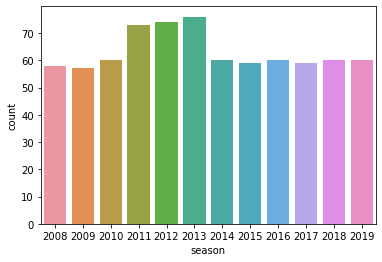

In [33]:
sns.countplot(x='season', data=df_ipl_matches)
plt.show()

In [24]:
df_ipl_matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [25]:
len(df_ipl_matches['season'].unique())

12

In [8]:
df_ipl_matches_deliveries.fillna(0,inplace=True)

In [54]:
df_ipl_matches_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,0,0,0
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,0,0,0


In [25]:
df_ipl_matches_deliveries.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

<AxesSubplot:>

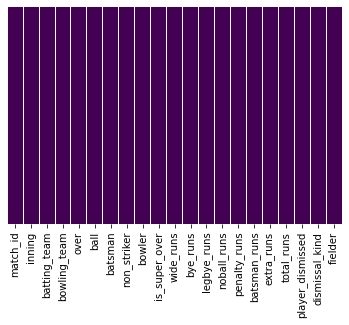

In [14]:
sns.heatmap(df_ipl_matches_deliveries.isnull(),yticklabels=False,cbar=False,cmap="viridis") 

# Step 2: Exploratory Analysis and Visualization

In [14]:
sns.color_palette("Paired")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# The team with most number of wins per season

In [55]:
teams_per_season = df_ipl_matches.groupby('season')['winner'].value_counts()
teams_per_season

season  winner
2008    RR        13
        KXIP      10
        CSK        9
        DD         7
        MI         7
                  ..
2019    KXIP       6
        SRH        6
        RCB        5
        RR         5
        0          1
Name: winner, Length: 102, dtype: int64

In [56]:
"""
for i, v in win_per_season.iteritems():
    print(i, v)
    
for items in win_per_season.iteritems():
    print(items)    
"""
year = 2008
win_per_season_df_ipl_matches = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df_ipl_matches = win_per_season_df_ipl_matches.append(win_series)
        year += 1   

((2008, 'RR'), 13)
((2009, 'DD'), 10)
((2010, 'MI'), 11)
((2011, 'CSK'), 11)
((2012, 'KKR'), 12)
((2013, 'MI'), 13)
((2014, 'KXIP'), 12)
((2015, 'CSK'), 10)
((2016, 'SRH'), 11)
((2017, 'MI'), 12)
((2018, 'CSK'), 11)
((2019, 'MI'), 11)


In [57]:
win_per_season_df_ipl_matches

,year,team,wins
0,2008,RR,13
0,2009,DD,10
0,2010,MI,11
0,2011,CSK,11
0,2012,KKR,12
0,2013,MI,13
0,2014,KXIP,12
0,2015,CSK,10
0,2016,SRH,11
0,2017,MI,12


# Visualization of Number of wins using barplot in seaborn

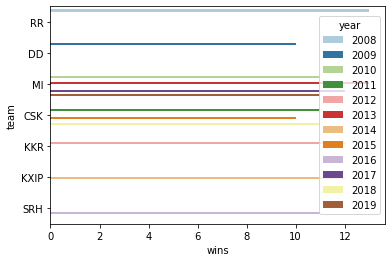

In [59]:
sns.barplot('wins', 'team', hue='year', data=win_per_season_df_ipl_matches, palette='Paired');

# Observations

# The venue that hosted the maximum number of matches

In [28]:
venue_ser = df_ipl_matches['venue'].value_counts()

In [29]:
venue_df_ipl_matches = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.iteritems():
    temp_df_ipl_matches = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df_ipl_matches = venue_df_ipl_matches.append(temp_df_ipl_matches, ignore_index=True)

# Visualization of Venues data 

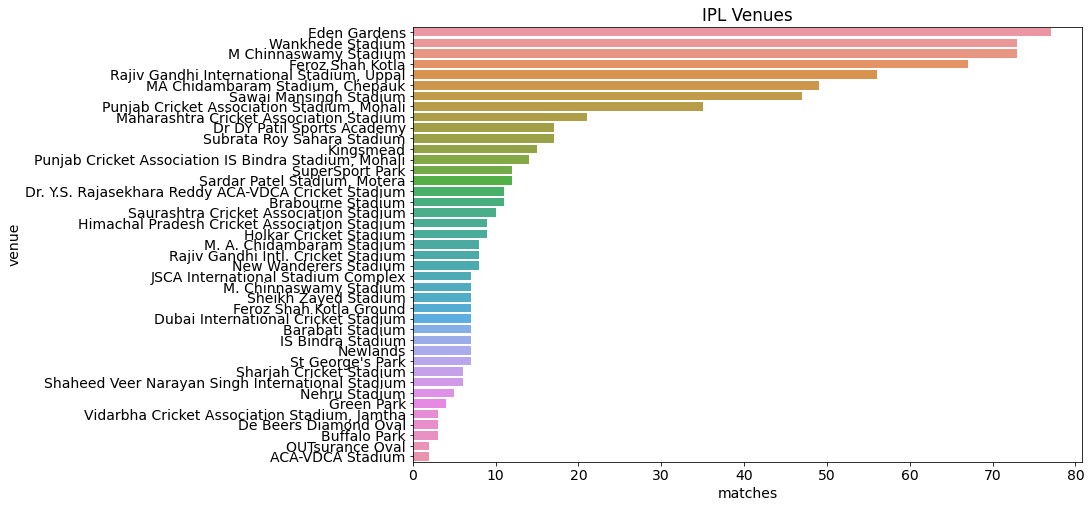

In [30]:
plt.title("IPL Venues")
sns.barplot(x='matches', y='venue', data=venue_df_ipl_matches);

# Number of matches played and venue 

In [31]:
venue_df_ipl_matches

,venue,matches
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Dr DY Patil Sports Academy,17


# Observations

# The most successful IPL team

In [20]:
team_wins_ser = df_ipl_matches['winner'].value_counts()

team_wins_df_ipl_matches = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df_ipl_matches = team_wins_df_ipl_matches.append(temp_df1, ignore_index=True)

# Finding the most successful IPL team

In [21]:
team_wins_df_ipl_matches

,team,wins
0,MI,109
1,CSK,100
2,KKR,92
3,RCB,84
4,KXIP,82
5,RR,75
6,DD,67
7,SRH,58
8,DCS,29
9,RPS,15


# Visualization of teams and number of wins data

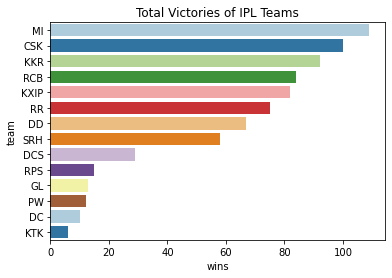

In [22]:
plt.title("Total Victories of IPL Teams")
sns.barplot(x='wins', y='team', data=team_wins_df_ipl_matches, palette='Paired');

# Observations

# Most Valuable Player

In [35]:
mvp_ser = df_ipl_matches['player_of_match'].value_counts()

mvp_ten_df_ipl_matches = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp_ser.iteritems():
    if count>9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_ten_df_ipl_matches = mvp_ten_df_ipl_matches.append(temp_df2, ignore_index=True)
        count += 1    

# Top ten most valuables players

In [36]:
mvp_ten_df_ipl_matches

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,RG Sharma,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,AM Rahane,12


# Visualization of data of top ten most valuable player and wins

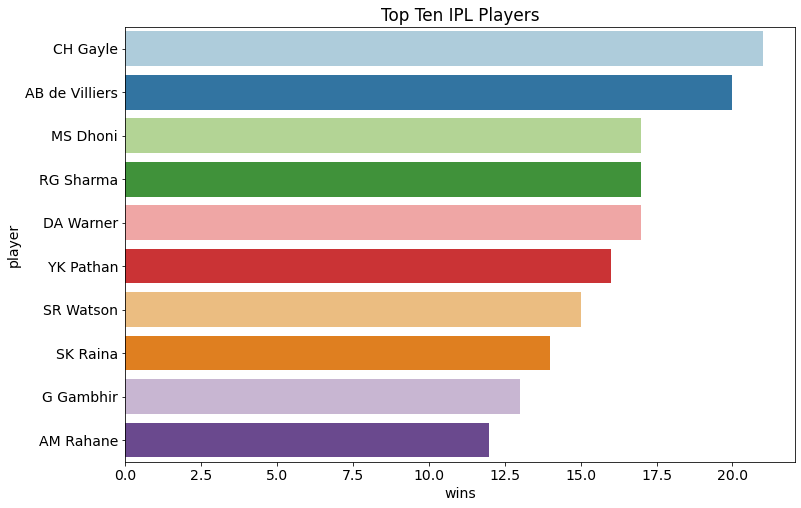

In [37]:
plt.title("Top Ten IPL Players")
sns.barplot(x='wins', y='player', data=mvp_ten_df_ipl_matches, palette='Paired');

# Observations

# Team that won the most number of toss

In [18]:
toss_ser = df_ipl_matches['toss_winner'].value_counts()

toss_df_ipl_matches = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df_ipl_matches = toss_df_ipl_matches.append(temp_df3, ignore_index=True) 

# Count of number of toss wins and teams

In [19]:
toss_df_ipl_matches

,team,wins
0,MI,98
1,KKR,92
2,CSK,89
3,KXIP,81
4,RCB,81
5,RR,80
6,DD,80
7,SRH,46
8,DCS,43
9,PW,20


# Visualization of data of team Vs toss win

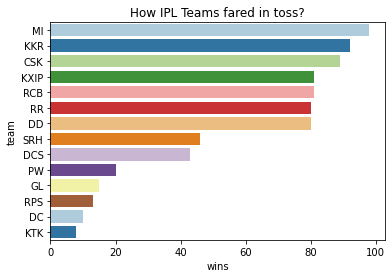

In [23]:
plt.title("How IPL Teams fared in toss?")
sns.barplot(x='wins', y='team', data=toss_df_ipl_matches, palette='Paired');

# Observations

In [26]:
df_ipl_matches['win_by']=np.where(df_ipl_matches['win_by_runs']>0,'Bat first','Bowl first')

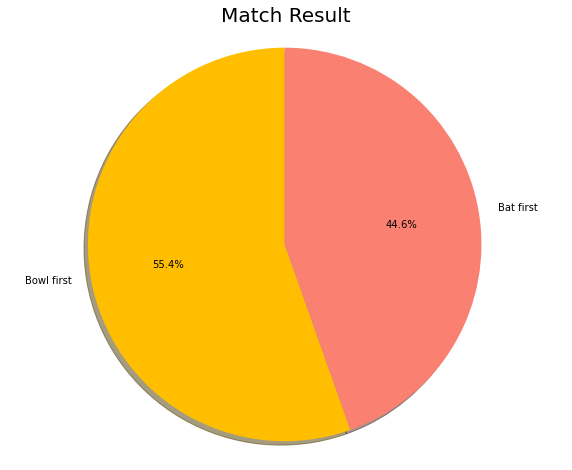

In [28]:
Win=df_ipl_matches.win_by.value_counts()
labels=np.array(Win.index)
sizes = Win.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=20)
plt.axis('equal')
plt.show()

In [31]:
df_ipl_matches.result.value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

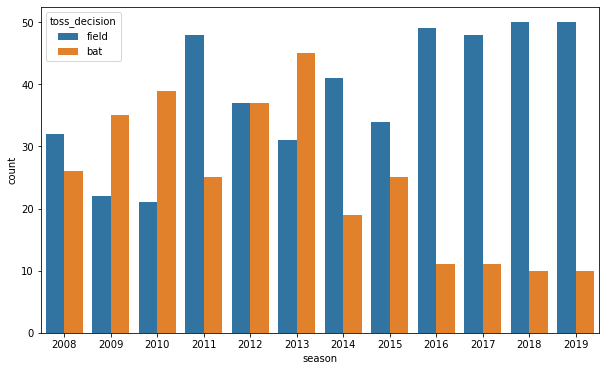

In [6]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=df_ipl_matches)
plt.show()

# Maximum Toss Winners

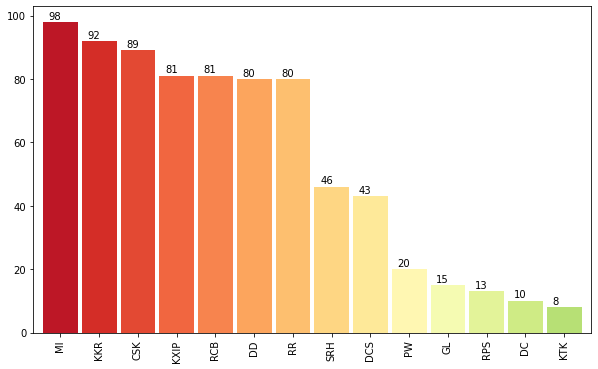

In [14]:
plt.subplots(figsize=(10,6))
ax=df_ipl_matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

# Is Toss Winner Also the Match Winner?

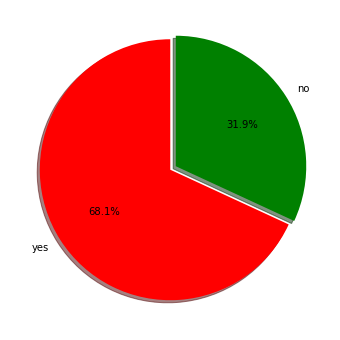

In [15]:
df=df_ipl_matches[df_ipl_matches['toss_winner']==df_ipl_matches['winner']]
slices=[len(df),(577-len(df))]
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

# Matches played across each season

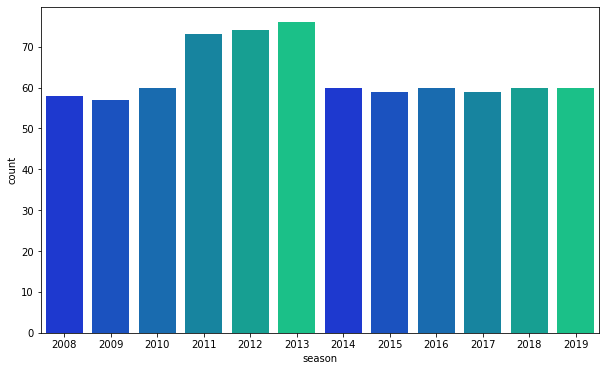

In [16]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',data=df_ipl_matches,palette=sns.color_palette('winter'))  #countplot automatically counts the frequency of an item
plt.show()

# Runs Across the Seasons

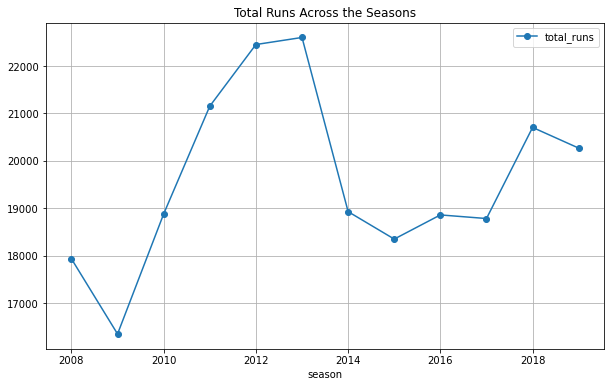

In [20]:
batsmen = df_ipl_matches[['id','season']].merge(df_ipl_matches_deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')
plt.gcf().set_size_inches(10,6)
plt.title('Total Runs Across the Seasons')
plt.grid()
plt.show()

# Average runs per match in each season

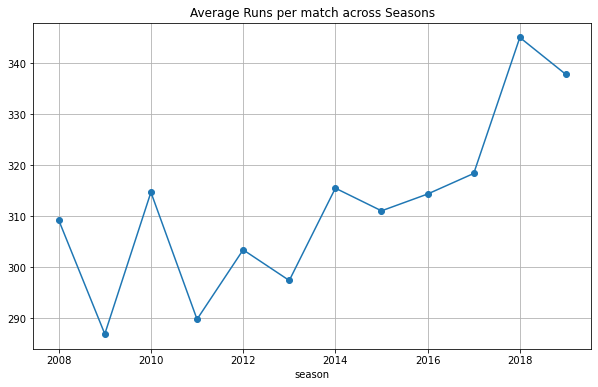

In [19]:
avgruns_each_season=df_ipl_matches.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'df_ipl_matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['df_ipl_matches']
avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker='o')
plt.gcf().set_size_inches(10,6)
plt.title('Average Runs per match across Seasons')
plt.grid()
plt.show()

# Sixes and Fours Across the Season

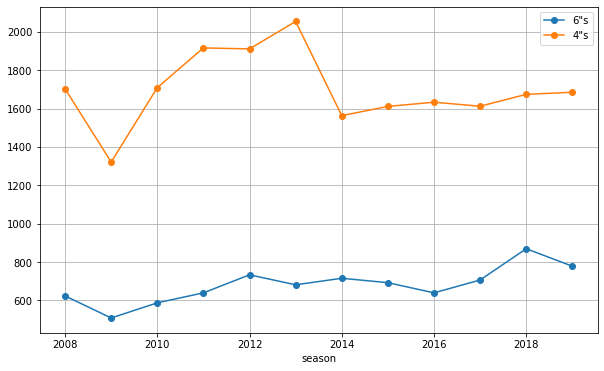

In [22]:
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='o')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.grid()
plt.show()

# Runs Scored By Batsman Across Seasons

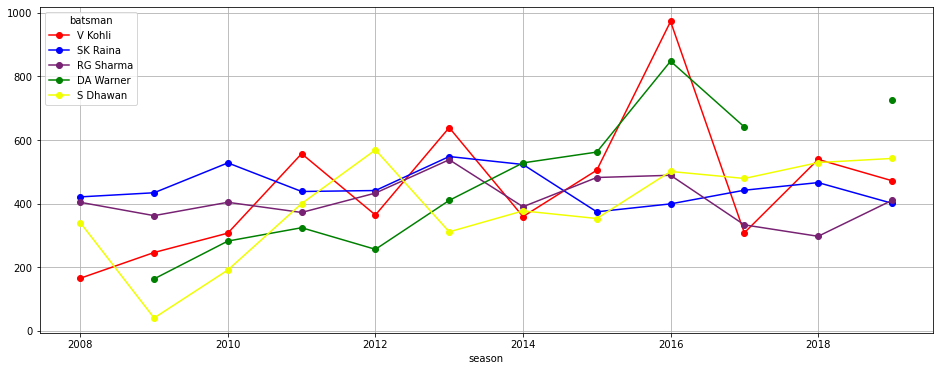

In [28]:
a=batsmen.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
a=a.groupby(['season','batsman'])['batsman_runs'].sum().unstack().T
a['Total']=a.sum(axis=1)
a=a.sort_values(by='Total',ascending=0)[:5]
a.drop('Total',axis=1,inplace=True)
a.T.plot(color=['red','blue','#772272','green','#f0ff00'],marker='o')
fig=plt.gcf()
fig.set_size_inches(16,6)
plt.grid()
plt.show()

# Top Individual Scores

In [38]:
top_scores = df_ipl_matches_deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
#top_scores=top_scores[top_scores['batsman_runs']>100]
top_scores.sort_values('batsman_runs', ascending=0).head(10)
top_scores.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,Royal Challengers Bangalore,175
900,60,BB McCullum,Kolkata Knight Riders,158
8426,562,AB de Villiers,Royal Challengers Bangalore,133
10149,7935,RR Pant,Delhi Daredevils,130
9257,620,AB de Villiers,Royal Challengers Bangalore,129
5585,372,CH Gayle,Royal Challengers Bangalore,128
3135,206,M Vijay,Chennai Super Kings,127
529,36,DA Warner,Sunrisers Hyderabad,126
7752,516,V Sehwag,Kings XI Punjab,122
10417,7953,SR Watson,Chennai Super Kings,121


# Top Batsman’s with 1’s, 2’s, 3’s, 4’s

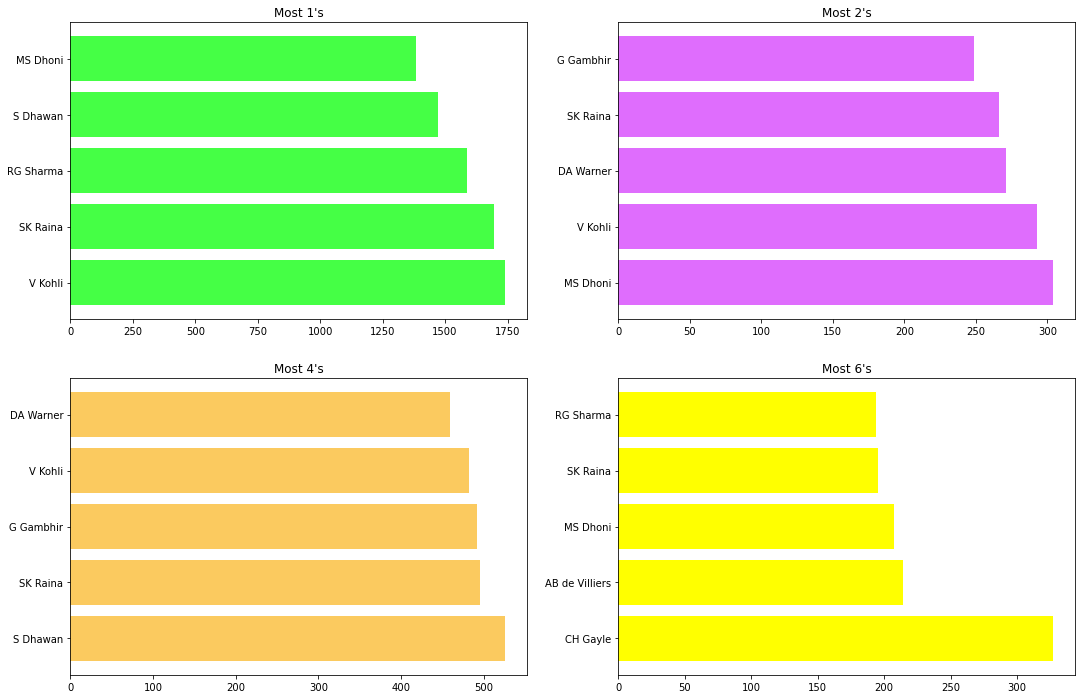

In [32]:
toppers=df_ipl_matches_deliveries.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
toppers=toppers.pivot('batsman','batsman_runs','total_runs')
fig,ax=plt.subplots(2,2,figsize=(18,12))
toppers[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='#45ff45',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel('')
toppers[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='#df6dfd',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel('')
toppers[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#fbca5f',width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel('')
toppers[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='#ffff00',width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel('')
plt.show()

# Individual Scores By Top Batsman each Inning

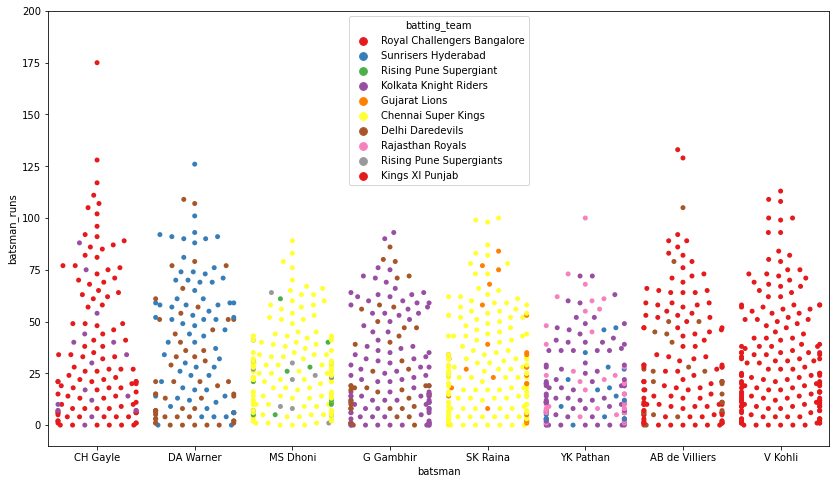

In [36]:
swarm=['CH Gayle','V Kohli','G Gambhir','SK Raina','YK Pathan','MS Dhoni','AB de Villiers','DA Warner']
scores = df_ipl_matches_deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
scores=scores[top_scores['batsman'].isin(swarm)]
sns.swarmplot(x='batsman',y='batsman_runs',data=scores,hue='batting_team',palette='Set1')
fig=plt.gcf()
fig.set_size_inches(14,8)
plt.ylim(-10,200)
plt.show()

# Top 10 Batsman

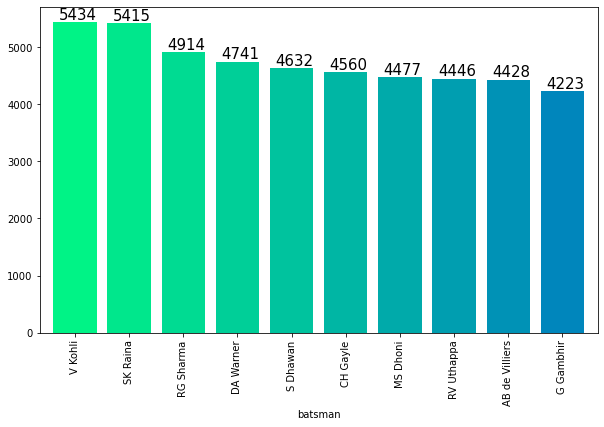

In [39]:
plt.subplots(figsize=(10,6))
max_runs=df_ipl_matches_deliveries.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('winter_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
plt.show()

# Maximum Man Of Matches

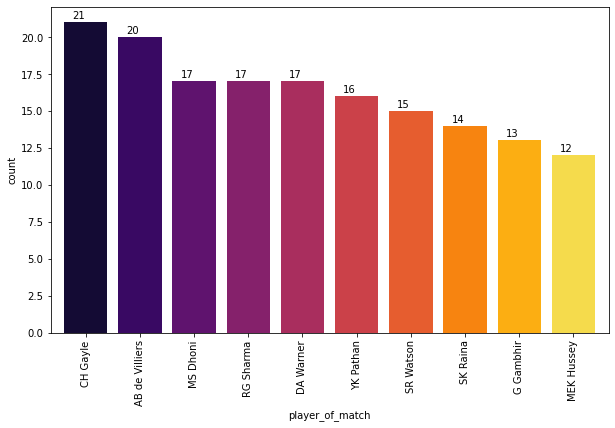

In [41]:
plt.subplots(figsize=(10,6))
#the code used is very basic but gets the job done easily
ax = df_ipl_matches['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))  
#counts the values corresponding 
# to each batsman and then filters out the top 10 batsman and then plots a bargraph 
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

# Maximum Runs Scored By Different Players In An Inning

In [8]:
batting_ings = df_ipl_matches_deliveries.groupby(['match_id','batsman']).apply(lambda x : np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')
sorted_batting_ings = batting_ings.sort_values(by='Innings Runs',ascending=False)
top_batsmen_scores = sorted_batting_ings[:10] 
ball_faced = df_ipl_matches_deliveries.groupby(['match_id','batsman']).apply(lambda x : x['batsman_runs'].count()).reset_index(name='Balls Faced')
batsmen_performance = pd.merge(top_batsmen_scores, ball_faced, how='inner', left_on=['match_id','batsman'], right_on=['match_id','batsman'])
batsmen_performance['Strike Rate for Match'] = batsmen_performance['Innings Runs']*100 / batsmen_performance['Balls Faced']
batsmen_innings = pd.merge(batsmen_performance, df_ipl_matches_deliveries, how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_innings_table = batsmen_innings.iloc[:,1:8]
batsmen_innings_table2 = batsmen_innings_table.drop_duplicates()
batsmen_innings_table2

,batsman,Innings Runs,Balls Faced,Strike Rate for Match,inning,batting_team,bowling_team
0,CH Gayle,175,69,253.623188,1,Royal Challengers Bangalore,Pune Warriors
69,BB McCullum,158,77,205.194805,1,Kolkata Knight Riders,Royal Challengers Bangalore
146,AB de Villiers,133,61,218.032787,1,Royal Challengers Bangalore,Mumbai Indians
207,RR Pant,130,64,203.125000,1,Delhi Daredevils,Sunrisers Hyderabad
271,AB de Villiers,129,53,243.396226,1,Royal Challengers Bangalore,Gujarat Lions
324,CH Gayle,128,62,206.451613,1,Royal Challengers Bangalore,Delhi Daredevils
386,M Vijay,127,57,222.807018,1,Chennai Super Kings,Rajasthan Royals
443,DA Warner,126,60,210.000000,1,Sunrisers Hyderabad,Kolkata Knight Riders
503,V Sehwag,122,62,196.774194,1,Kings XI Punjab,Chennai Super Kings
565,SR Watson,121,60,201.666667,2,Chennai Super Kings,Sunrisers Hyderabad


# Maximum Wickets taken by bowlers in last 12 seasons

In [9]:
bowling_wickets = df_ipl_matches_deliveries[df_ipl_matches_deliveries['dismissal_kind']!='run out']
bowling_total = bowling_wickets.groupby('bowler').apply(lambda x : x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wicket_count = bowling_total.groupby('bowler').count().reset_index()
bowling_top = bowling_wicket_count.sort_values(by='Wickets',ascending=False)
top_bowlers = bowling_top.loc[:,['bowler','Wickets']][0:10]
top_bowlers

,bowler,Wickets
290,SL Malinga,170
6,A Mishra,156
110,Harbhajan Singh,150
227,PP Chawla,149
82,DJ Bravo,147
46,B Kumar,133
232,R Ashwin,125
296,SP Narine,122
326,UT Yadav,119
244,RA Jadeja,108


# Top ten bowlers

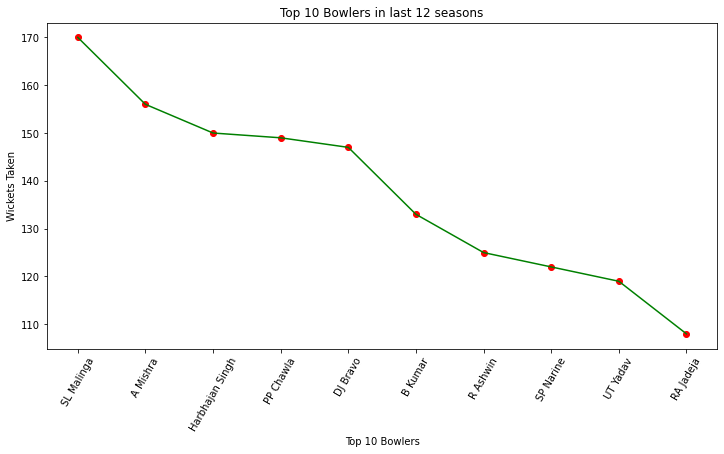

In [10]:
plt.figure(figsize=(12,6))
plt.scatter(top_bowlers['bowler'],top_bowlers['Wickets'],color='r');
plt.plot(top_bowlers['bowler'],top_bowlers['Wickets'],color='g');
plt.xticks(rotation=60)
plt.xlabel('Top 10 Bowlers')
plt.ylabel('Wickets Taken')
plt.title('Top 10 Bowlers in last 12 seasons');

# Matches Played vs Matches Won

In [16]:
matches_played=pd.concat([df_ipl_matches['team1'],df_ipl_matches['team2']])
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']
matches_played['wins']=df_ipl_matches['winner'].value_counts().reset_index()['winner']

matches_played.set_index('Team',inplace=True)

In [17]:
matches_played.reset_index()

,Team,Total Matches,wins
0,Mumbai Indians,187,109
1,Royal Challengers Bangalore,180,100
2,Kolkata Knight Riders,178,92
3,Kings XI Punjab,176,84
4,Chennai Super Kings,164,82
5,Delhi Daredevils,161,75
6,Rajasthan Royals,147,67
7,Sunrisers Hyderabad,108,58
8,Deccan Chargers,75,29
9,Pune Warriors,46,13


In [18]:
win_percentage = round(matches_played['wins']/matches_played['Total Matches'],3)*100
win_percentage

Team
Mumbai Indians                 58.3
Royal Challengers Bangalore    55.6
Kolkata Knight Riders          51.7
Kings XI Punjab                47.7
Chennai Super Kings            50.0
Delhi Daredevils               46.6
Rajasthan Royals               45.6
Sunrisers Hyderabad            53.7
Deccan Chargers                38.7
Pune Warriors                  28.3
Gujarat Lions                  40.0
Rising Pune Supergiant         62.5
Delhi Capitals                 62.5
Rising Pune Supergiants        42.9
Kochi Tuskers Kerala           35.7
dtype: float64

# Step 3: Extracting Insights 

# Does the presence of most valuable players in a team ensures IPL trophy?

# Top ten Most Valuable Players

In [42]:
mvp_ten_df_ipl_matches

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,RG Sharma,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,AM Rahane,12


# Which umpire has officiated the most number of IPL matches on-field?

In [43]:
umpire1_ser = df_ipl_matches['umpire1'].value_counts()
umpire2_ser = df_ipl_matches['umpire2'].value_counts()

# Umpires and Number of matches

In [45]:
umpires_df_ipl_matches = pd.concat([umpire1_ser, umpire2_ser], axis=1)
umpires_df_ipl_matches

,umpire1,umpire2
HDPK Dharmasena,73.0,14.0
Asad Rauf,51.0,NaN
S Ravi,49.0,57.0
AK Chaudhary,43.0,15.0
Aleem Dar,38.0,NaN
...,...,...
K Srinivasan,NaN,3.0
KN Anantapadmanabhan,NaN,3.0
SD Ranade,NaN,2.0
Nand Kishore,NaN,1.0


In [47]:
umpire_ser = umpires_df_ipl_matches.sum(axis=1)

umpire_df_ipl_matches = pd.DataFrame(columns=["umpire", "matches"])

for items in umpire_ser.iteritems():
    temp_df4 = pd.DataFrame({
        'umpire':[items[0]],
        'matches':[items[1]]
    })
    umpire_df_ipl_matches= umpire_df_ipl_matches.append(temp_df4, ignore_index=True) 

In [48]:
umpire_df_ipl_matches.sort_values('matches', ascending=False).head()

,umpire,matches
2,S Ravi,106.0
0,HDPK Dharmasena,87.0
11,C Shamshuddin,73.0
3,AK Chaudhary,58.0
57,SJA Taufel,55.0


# Which team is the most successful team in IPL?

# Number of wins per season

In [22]:
teams_per_season = df_ipl_matches.groupby('season')['winner'].value_counts()
teams_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [24]:
"""
for i, v in win_per_season.iteritems():
    print(i, v)
    
for items in win_per_season.iteritems():
    print(items)    
"""
year = 2008
win_per_season_df_ipl_matches = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df_ipl_matches = win_per_season_df_ipl_matches.append(win_series)
        year += 1  

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [27]:
win_per_season_df_ipl_matches

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


# Total wins per team

In [26]:
team_wins_df_ipl_matches

,team,wins
0,MI,109
1,CSK,100
2,KKR,92
3,RCB,84
4,KXIP,82
5,RR,75
6,DD,67
7,SRH,58
8,DCS,29
9,RPS,15


# Which city has hosted the maximum number of IPL matches?

# Data of City vs Number of matches hosted

In [51]:
df_ipl_matches['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Cape Town           7
Abu Dhabi           7
Port Elizabeth      7
Ranchi              7
Cuttack             7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

# Visualization of data of Cities hosted IPL matches Vs Number of matches

In [52]:
city_ser = df_ipl_matches['city'].value_counts()

city_df_ipl_matches = pd.DataFrame(columns=['city', 'matches'])
for items in city_ser.iteritems():
    temp_df6 = pd.DataFrame({
        'city':[items[0]],
        'matches':[items[1]]
    })
    city_df_ipl_matches = city_df_ipl_matches.append(temp_df6, ignore_index=True)

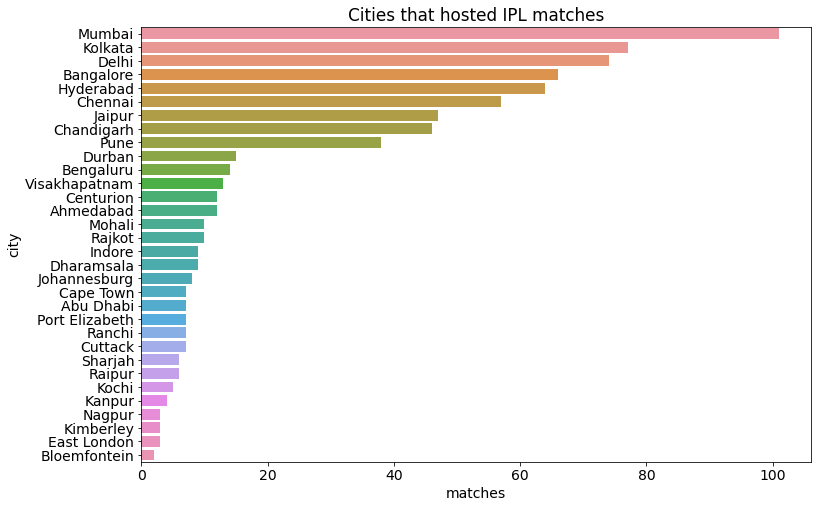

In [53]:
plt.title("Cities that hosted IPL matches")
sns.barplot(x='matches', y='city', data=city_df_ipl_matches);

# Does winning toss has any advantage?

In [54]:
win_count = 0
for index, value in df_ipl_matches.iterrows():
    if(value['toss_winner']==value['winner']):
#         print(value['winner'])
        win_count += 1

print(f'The number of times the team winning toss have won: {win_count}')
prob = win_count/len(df_ipl_matches)
print('The probability of winning if won the toss: {:.2f}' .format(prob))    

The number of times the team winning toss have won: 393
The probability of winning if won the toss: 0.52


# What are the major victories in IPL? Is it better to defend or chase in IPL?

# Length of the matches

In [56]:
len(df_ipl_matches)

756

# Number of Defending & Chansing Matches won 

In [57]:
defend_vict_ser = df_ipl_matches['win_by_runs'].value_counts()
defend_vict_ser.sort_values(ascending=True)

146      1
98       1
77       1
93       1
102      1
      ... 
1       10
10      11
4       11
14      13
0      419
Name: win_by_runs, Length: 89, dtype: int64

# Observation 

# Match with a defending total, the biggest victory was by 146 runs

In [58]:
score = 146
for index, row in df_ipl_matches.iterrows():
    if(row['win_by_runs'] == score):
        print(row)  

id                               44
season                         2017
city                          Delhi
date                     06-05-2017
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object


# Observation 

In [59]:
chasing_vict_ser = df_ipl_matches['win_by_wickets'].value_counts()
chasing_vict_ser

0     350
6      85
7      80
5      71
8      54
4      41
9      37
3      18
10     11
2       6
1       3
Name: win_by_wickets, dtype: int64

# Matches win by wickets (Defending)

In [60]:
for index, row in df_ipl_matches.iterrows():
    if(row['win_by_wickets'] == 10):
        print(row)

id                                                      3
season                                               2017
city                                               Rajkot
date                                           07-04-2017
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
Name: 2, dtype

In [61]:
chasing_vict_df_ipl_matches = pd.DataFrame(columns=['victory_margin', 'instances'])

for items in chasing_vict_ser.iteritems():    
    temp_df7 = pd.DataFrame({
        'victory_margin': [items[0]],
        'instances': [items[1]]
    })
    chasing_vict_df_ipl_matches = chasing_vict_df_ipl_matches.append(temp_df7, ignore_index=True)
    
#to drop the first row as it represents victory margin of zero wickets(victory by defending a total)
chasing_vict_df2 = chasing_vict_df_ipl_matches.drop([0]) 
chasing_vict_df2

,victory_margin,instances
1,6,85
2,7,80
3,5,71
4,8,54
5,4,41
6,9,37
7,3,18
8,10,11
9,2,6
10,1,3


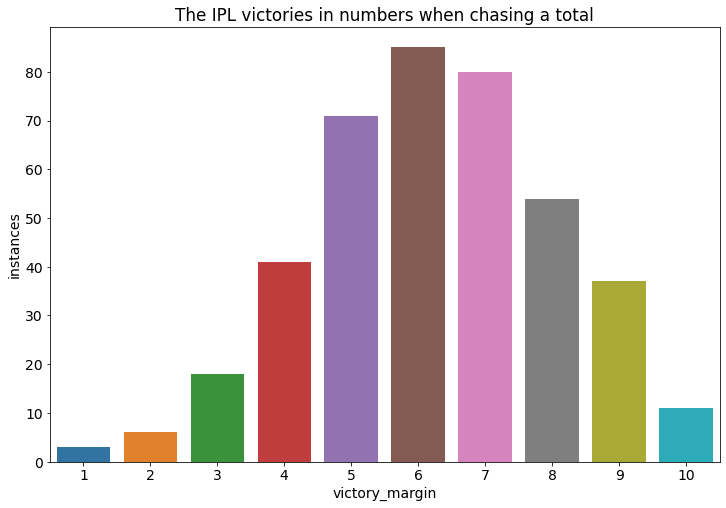

In [62]:
plt.title('The IPL victories in numbers when chasing a total')
sns.barplot(x='victory_margin', y='instances', data=chasing_vict_df2);

# Inferences and Conclusion

# Thank You